In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import tueb_data as data

In [2]:
import sys
sys.path.append("../twintest")

In [3]:
import causality as intest
import viz

In [4]:
meta_data = data.get_metadata()

In [5]:
data_info = meta_data[-2]
print('pair number', data_info['pair_number'])

pair number 47


Causal direction: 1 means that X -> Y; and 0 the other way around.

In [6]:
x, y = data.load_sample(data_info)
print('Causal direction:', data_info['causality'])
print('nb samples:', len(x))

Causal direction: 0
nb samples: 254


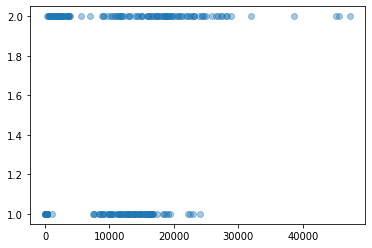

In [7]:
viz.pretty_scatter(x, y)

In [8]:
X_, Y_, _ = intest.partition_data(x, y)

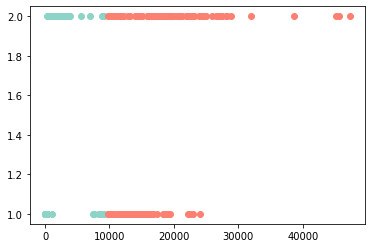

In [9]:
viz.plot_scatters(X_, Y_)

In [10]:
residuals, X_, Y_, models = intest.estimate_partitioned_models(x, y)
score, pairs = intest.find_max_discrp(residuals)

In [11]:
score

1.1488648090815277

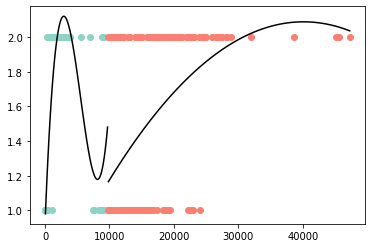

In [12]:
viz.plot_models(X_, Y_, models)

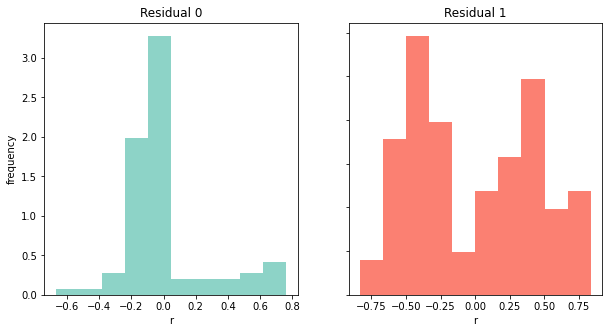

In [13]:
viz.plot_residuals(residuals)

In [14]:
X_r, Y_r, _ = intest.partition_data(y, x)

../twintest/causality.py:28: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n_c, random_state=0).fit(x.reshape(-1, 1))


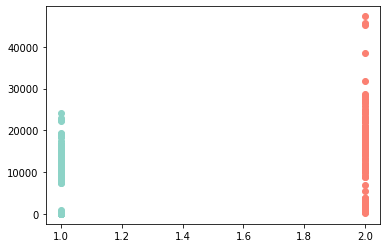

In [15]:
viz.plot_scatters(X_r, Y_r)

In [16]:
residualsr, Y_r, X_r, modelsr = intest.estimate_partitioned_models(y, x)
scorer, pairsr = intest.find_max_discrp(residualsr)

../twintest/causality.py:28: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n_c, random_state=0).fit(x.reshape(-1, 1))


In [17]:
scorer

0.12598425196850388

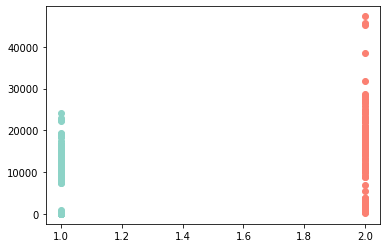

In [18]:
viz.plot_models(Y_r, X_r, modelsr)

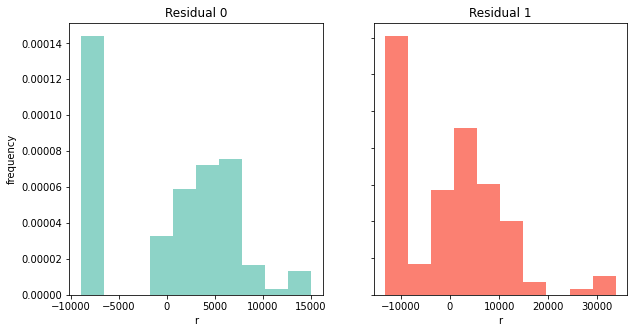

In [19]:
viz.plot_residuals(residualsr)

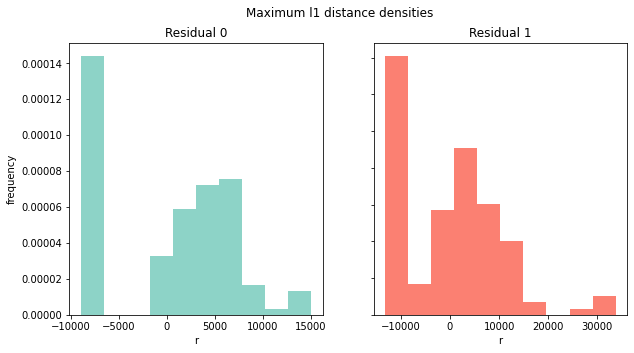

In [20]:
viz.plot_residuals(residualsr, res_filter=pairsr, title='Maximum l1 distance densities')

In [21]:
print('X -> Y', score)

X -> Y 1.1488648090815277


In [22]:
print('X <- Y', scorer)

X <- Y 0.12598425196850388


In [23]:
# avg dist to avg
# can use models to easily compute an estimate cheaply (add point and degree-> regress)
# var / moment est for low sample regime

# discretise based on largest support (min, max) , see hist param

In [24]:
print('predicted:', int(score < scorer))

predicted: 0


In [25]:
print('Truth:', data_info['causality'])

Truth: 0
